# Problem statement

### Observation: On average men eat more hot wings than women. Is this difference a random or real effect?

# Two-Sample Permutation Test

In [ ]:
#H_0 = null hypothesis (no effect); H_A = alternative hypothesis (real effect)
#test hypothesis: H_0: mean(Male)-mean(Female)=0  versus  H_A: mean(Male)-mean(Female)>0 

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [20]:
df = pd.read_csv('data/Beerwings.csv')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        30 non-null     int64 
 1   Hotwings  30 non-null     int64 
 2   Beer      30 non-null     int64 
 3   Gender    30 non-null     object
dtypes: int64(3), object(1)
memory usage: 1.1+ KB


In [22]:
df.head()  #gender: male (M) and female (F)

,ID,Hotwings,Beer,Gender
0,1,4,24,F
1,2,5,0,F
2,3,5,12,F
3,4,6,12,F
4,5,7,12,F


##  Distribution of Hotwings

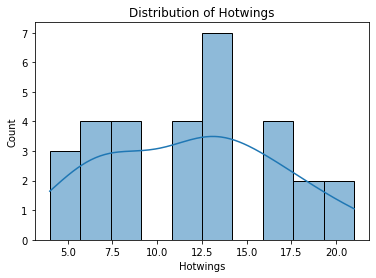

In [23]:
plt.figure(figsize = (6, 4), dpi=72)  #default dpi=100
ax = sns.histplot(df['Hotwings'], bins=10, kde=True)
ax.set(xlabel='Hotwings')
plt.title('Distribution of Hotwings')
plt.show()

## Hotwings consumed by gender

In [24]:
df['Gender'].value_counts()

F    15
M    15
Name: Gender, dtype: int64

In [35]:
male = df[df['Gender']=='M']

In [36]:
female = df[df['Gender']=='F']

In [64]:
obs_df = pd.DataFrame({'Male': male['Hotwings'].to_numpy(), 'Female': female['Hotwings'].to_numpy()})

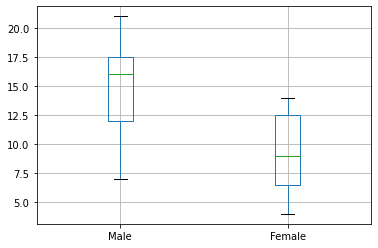

In [65]:
obs_df.boxplot(grid = True)
plt.show()

## Observed test statistic

In [ ]:
#assume that test statistic is mean difference

In [58]:
male['Hotwings'].mean()

14.533333333333333

In [42]:
female['Hotwings'].mean()

9.333333333333334

In [55]:
observed = male['Hotwings'].mean() - female['Hotwings'].mean()  #observed mean difference between male and female

In [56]:
observed

5.199999999999999

## Calculate permutation distribution

In [ ]:
#single population of 30 members (male and female) is randomly divided into two groups (sample1, sample2) of size 15 each;s
#process is repeated a number of times.

In [59]:
N = 10**4-1
result = np.zeros(N)
for i in range(N):
    sample_1 = df['Hotwings'].sample(n=15)
    sample_2 = df['Hotwings'].iloc[df.index.difference(sample_1.index)]
    result[i] = sample_1.mean()-sample_2.mean()

## Distribution of test statistic (difference in means)

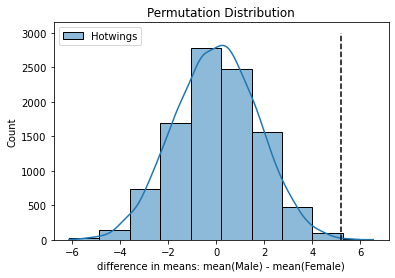

In [60]:
plt.figure(figsize = (6, 4), dpi=72)  #default dpi=100
ax = sns.histplot(pd.DataFrame(result), bins=10, kde=True, label='Hotwings')
plt.plot([observed, observed], [0, 3000], "k--")
ax.set(xlabel='difference in means: mean(Male) - mean(Female)')
plt.legend(loc='best')
plt.title('Permutation Distribution')
plt.show()

In [61]:
p_value = (sum(result >= observed)+1)/(N+1); p_value  #p_value = area under PDF for values larger than observed value

0.001

In [62]:
#if p_value < significance level (1%) then accept alternative hypothesis (H_A)
alpha = 0.01  #set significance level
H_A = p_value < alpha  #test alternative hypothesis

In [63]:
H_A  #alternative hypothesis is accepted if P(T>=observed)< alpha; T=test statistic; observed = observed test statistic;

True